In [1]:
from hfgtools import *

In [186]:
from datetime import datetime, date

In [201]:
import matplotlib.pyplot as plt

In [2]:
inpath = r'T:\DCProjects\Support\Lane\HfG\DataFromThem'

In [3]:
# oa - online applications
oa = pd.read_csv(inpath + '\\OnlineApplications.csv')

In [5]:
oa.columns

Index(['KeyApplication', 'AgencyID', 'WLNumber', 'WLName', 'Language',
       'NameFirst', 'NameMiddle', 'NameLast', 'MailAddress1', 'MailAddress2',
       'MailCity', 'MailState', 'MailZIP', 'MailZIP4', 'LegalAddress1',
       'LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4',
       'Phone', 'MobilePhone', 'OtherContact', 'OtherType', 'SSN', 'DOB',
       'EmancipatedMinor', 'Sex', 'Disabled', 'Race', 'Ethnicity',
       'HouseholdSize', 'HouseholdMinors', 'IncomeAnnual', 'IncomeChecking',
       'IncomeSavings', 'IncomeInvestments', 'IncomeRealEstate', 'IncomeOther',
       'AssetsChecking', 'AssetsSavings', 'AssetsInvestments',
       'AssetsRealEstate', 'AssetsOther', 'QuestionIDs', 'OptOut92006',
       'PreviousAgencyID', 'TSModified', 'TSCreated', 'ApplicationTS',
       'eAgree', 'AddressValidation', 'LotteryNumber', 'Citizenship',
       'OptOutSSN', 'AccountEmail'],
      dtype='object')

In [198]:
oa['Age'] = oa['DOB'].apply(lambda x: calculate_age(x))

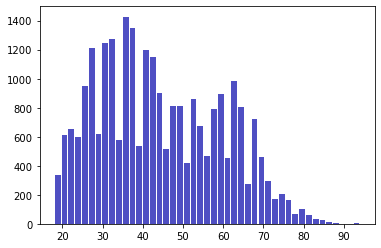

In [203]:
plt.hist(x=oa['Age'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85);

In [199]:
oa['Age'].value_counts()

35    760
38    740
28    684
36    667
33    656
     ... 
88      7
87      6
85      4
94      3
93      1
Name: Age, Length: 73, dtype: int64

In [197]:
oa['Language'].value_counts()

eng    25683
spa       35
Name: Language, dtype: int64

In [159]:
oa.shape

(25718, 56)

In [158]:
len(oa.KeyApplication.unique())

25718

In [37]:
oa.loc[oa.KeyApplication==5419013, ['LegalAddress1','LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4']]

,LegalAddress1,LegalAddress2,LegalCity,LegalState,LegalZIP,LegalZIP4
0,1071 FAIRFIELD AVE,APT 100,EUGENE,OR,97402,2063.0


In [36]:
oa.loc[oa.KeyApplication==5419013, ['HouseholdSize', 'HouseholdMinors', 'PreviousAgencyID', 'Citizenship']]

,HouseholdSize,HouseholdMinors,PreviousAgencyID,Citizenship
0,3,1,NaN,EC


In [8]:
os.listdir(inpath)

['ApplicantIncome.csv',
 'ApplicationContacts.csv',
 'ApplicationMembers.csv',
 'ApplicationQuestionHistory.csv',
 'Codes added via KEY LCOG WaitlistConnect2022_Draft_D20221201 (003).xlsx',
 'Dashboard visual with RA Added.pptx',
 'HowDidYouHear.xlsx',
 'OnlineApplications.csv']

In [9]:
# applicant income
ai = pd.read_csv(inpath + '\\ApplicantIncome.csv')

In [27]:
ai.loc[ai.KeyApplication==5419013, ['KeyIncome', 'Amount', 'HowOften']]

,KeyIncome,Amount,HowOften
0,6471877,3500.0,Monthly


In [28]:
3500*12

42000

In [10]:
# application contacts
ac = pd.read_csv(inpath + '\\ApplicationContacts.csv')

In [17]:
ac.columns

Index(['KeyContact', 'KeyApplication', 'Name', 'StreetAddress', 'City',
       'State', 'ZIP', 'PhoneNumber', 'CellNumber', 'Email', 'Relationship',
       'ReasonEmergency', 'ReasonUnableToContact', 'ReasonTermination',
       'ReasonEviction', 'ReasonLatePayment', 'ReasonRecertification',
       'ReasonChangeInLeaseTerms', 'ReasonChangeInHouseRules', 'ReasonOther',
       'ReasonOtherDetail', 'TSModified', 'TSCreated'],
      dtype='object')

In [30]:
ac.loc[ac.KeyApplication==5419013, 'Name']

Series([], Name: Name, dtype: object)

In [11]:
# application members
am = pd.read_csv(inpath + '\\ApplicationMembers.csv')

In [19]:
am.columns

Index(['KeyMember', 'KeyApplication', 'NameLast', 'NameMiddle', 'NameFirst',
       'SSN', 'DOB', 'Sex', 'Disabled', 'Relationship', 'Citizenship', 'Race',
       'Ethnicity'],
      dtype='object')

In [187]:
def calculate_age(dob):
    born = datetime.strptime(dob, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [189]:
am['Age'] = am['DOB'].apply(lambda x: calculate_age(x))

In [192]:
am['Age'].value_counts()

1     1299
4     1276
2     1258
3     1122
6     1119
      ... 
88       9
87       6
85       4
94       3
93       1
Name: Age, Length: 91, dtype: int64

In [193]:
am['Sex'].value_counts()

F    29022
M    20355
Name: Sex, dtype: int64

In [194]:
am['Disabled'].value_counts()

0    34796
1    14581
Name: Disabled, dtype: int64

In [195]:
am['Race'].value_counts()

1            36615
2             3140
6             2807
3             1462
1,3            991
             ...  
1,4g,6           1
3,1,2            1
1,2,4b           1
1,2,3,5,6        1
4,1,2,6          1
Name: Race, Length: 131, dtype: int64

In [196]:
am['Ethnicity'].value_counts()

0    42013
1     7364
Name: Ethnicity, dtype: int64

In [185]:
datetime.strptime(am.DOB.values[0], '%Y-%m-%d')

datetime.datetime(1988, 12, 4, 0, 0)

In [141]:
am.Citizenship.unique()

array(['EC', 'EN', 'IN', 'PV', 'IC', 'ND', nan], dtype=object)

In [12]:
# application question history
aqh = pd.read_csv(inpath + '\\ApplicationQuestionHistory.csv')

In [21]:
aqh.columns

Index(['QuestionID', 'KeyApplication', 'Question', 'Preference', 'Answer',
       'Response', 'TSModified', 'TSCreated'],
      dtype='object')

In [161]:
len(aqh.KeyApplication.unique())

25718

In [169]:
howheard = aqh[aqh.Preference=='P9']

In [175]:
howheard.Answer.unique()

array(['Yes', 'No'], dtype=object)

In [170]:
howheard['Response'] = howheard['Response'].str.capitalize()

<ipython-input-170-e7b5185181ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  howheard['Response'] = howheard['Response'].str.capitalize()


In [171]:
howheard.Response.value_counts()

Email                                                                   2757
Friend                                                                  2306
Facebook                                                                1148
Family                                                                  1092
Case manager                                                             800
                                                                        ... 
One of my case managers at senior & disability services let me know.       1
Phone call.                                                                1
St vincent had documents                                                   1
Email / boss at allies, llc                                                1
I check the homes for good website often                                   1
Name: Response, Length: 2958, dtype: int64

In [172]:
hhout = howheard.Response.value_counts().rename_axis('how').reset_index(name='counts')

In [173]:
hhout.to_csv(r'T:\DCProjects\Support\Lane\HfG\how_heard.csv', index=False)

In [146]:
aqh.Preference.unique()

array(['P5', 'P7', 'P8', 'P9'], dtype=object)

In [143]:
aqh.Question.unique()

array(['Do you require a wheelchair accessible unit? This question is for data purposes only.',
       'Are you or anyone in your household currently homeless?  This includes currently living in a car, on the street, in an emergency shelter, transitional housing, or currently living in a friend or family members home, or couch surfing? If yes, where are you currently living?',
       'Did someone help you complete this application? If yes, then who?',
       'How did you hear about our wait list opening?  Please fill in the following box with an answer (Ex. Text message, email, Facebook, RegisterGuard, family/friend, etc.)'],
      dtype=object)

In [92]:
df = aqh[(aqh.Preference=='P8') & (aqh.Answer=='Yes')]

In [43]:
agencies = list(aqh.loc[(aqh.Preference=='P8') & (aqh.Answer=='Yes'), 'Response'].unique())

In [134]:
df.loc[df.Response=='Kat', 'Response'] = 'Kat '

In [152]:
df.loc[:, 'ResCat'] = df['Response'].apply(lambda x: categorize_response(x))

C:\Users\clid1852\AppData\Anaconda3\envs\geoenv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [178]:
df['ResCat'].value_counts().rename_axis('who_helped').reset_index(name='counts').head(30)

,who_helped,counts
0,Homes For Good,2846
1,family,1505
2,others,1135
3,St. Vincent de Paul,1071
4,case manager,680
5,Housing Navigator,524
6,support staff,298
7,case worker,274
8,Laurel Hill Center,267
9,Lane County,267


In [153]:
out = df[df.ResCat == "others"]["Response"].value_counts().rename_axis('name').reset_index(name='counts')

In [154]:
out.to_csv(r'T:\DCProjects\Support\Lane\HfG\who_helped_others.csv', index=False)

In [138]:
sorted(list(df.loc[df.ResCat == "others", "Response"].unique()))

['07/26/2022',
 'Abby Olivera-Ruiz',
 'Aisha McCoy',
 'Albert Nash',
 'Alec Lively',
 'Alissa Moosbrugger',
 'Alvin Bradford',
 'Amanda',
 'Amanda Cowan',
 'Amanda Laufer',
 'Amanda Newman',
 'Amanda cowan',
 'Amelia Jans, CSWA - therapist',
 'Amie Holland',
 'Anabel Sanchez',
 'Angel Shaffer',
 'Angela Miller',
 'Angelica Talamante',
 'Anika Greene',
 'Anita Allen',
 'April Morales',
 'Ashely',
 'Ashley',
 'Ashley D',
 'Becky McNichols',
 'Belinda McClain',
 'Bobbi Bullock',
 'Brandy Teel',
 'Brenda',
 'Brenda Heth',
 'Brittany Cartwright',
 'Brittany Carwright',
 'CC',
 'Carl Davis',
 'Cassidy Cockle',
 'Cathleen Reyes',
 'Catrina A',
 'Catrina a',
 'Centro Latino pop up - Beatriz',
 'Chad Estrella',
 'Charles Clark',
 'Choice',
 'Chris',
 'Christi Champ',
 'Christine a counselor at  Serenity Lane',
 'Christy Waltz',
 'Chrystal Carreras',
 'Councilor Loraine moyer',
 'Councilor Lorane Moyer',
 'Counselor',
 'Courtney McCloskey - Resident  Services Specialist',
 'DSP Tammie Coltrane',

In [151]:
def categorize_response(x):
    #print(x)
    wf = re.search("WILLAMETTE fAMILY|WF|wam fam|wamfam|fam", x, re.IGNORECASE)
    lh = re.search("Legacy Health", x, re.IGNORECASE)
    em = re.search("julie hansen|eugene mission", x, re.IGNORECASE)
    family = re.search("mom|daughter|son|father|mother|sister|brother|family|niece|wife|parent|cousin|step child|spouse|daugheter|daighter|daugter|husband|uncle|aunt|legal guardian|Dad", x, re.IGNORECASE)
    friend = re.search("girlfriend|friend|Frend|coworker|Roommate|neighbor", x, re.IGNORECASE)
    manager = re.search("Case Manager|Caser manager|cm|Case Mgr|case manger|NCM|Case Management|Case Managment|Case  Manager|casemanager|Case Mnager", x, re.IGNORECASE)
    hfg = re.search("HFG|Homes For Good|Home4Good|homes fro Good|Home for Good|flyer|541-682-2550|Resident Services|Cappy|Sarah Stanley|Kat |JJ|Laci Pope|Dustin|Johanna|L. Pope|Waitlist connect|Duncan|Melissa Hartman|Maclain Barney|don", x, re.IGNORECASE)
    btsa = re.search("Black Thistle street aid|Bridgette", x, re.IGNORECASE)
    rn = re.search("Relief Nursery", x, re.IGNORECASE)
    csi = re.search("ColumbiaCare", x, re.IGNORECASE)
    ccs = re.search("Catholic community services", x, re.IGNORECASE)
    sc = re.search("ShelterCare|Ruby Renfro|SC Staff", x, re.IGNORECASE)
    sce = re.search("Sunshine Care Environments", x, re.IGNORECASE)
    lcsw = re.search('LCSW', x, re.IGNORECASE)
    lc = re.search("Lane COunty", x, re.IGNORECASE)
    step = re.search("STEP|Gretchen Stupke|Lindsay|Gretchen Stupke", x, re.IGNORECASE)
    cw = re.search("Case Worker|caseworker", x, re.IGNORECASE)
    cs = re.search("Community Share|Community Sharing", x, re.IGNORECASE)
    lcbh = re.search("LCBH|Lane County Behavioral Health", x, re.IGNORECASE)
    lcdp = re.search("Dovetail", x, re.IGNORECASE)
    cg = re.search("caregiver", x, re.IGNORECASE)
    cfnc =  re.search("Coast Fork Nursing Center", x, re.IGNORECASE)
    svdp = re.search("SVDP|St. Vincent de paul|Vikki Perpinan|Melissa Swick|Sarah Koski|Jeff Wolfe|Amber Fitch|Vikki  Perpinan|Vikki M Perpinan|VikkiPerpinan", x, re.IGNORECASE)
    oslp = re.search("Oregon Supported Living Program", x, re.IGNORECASE)
    lila = re.search("Independent Living|LILA", x, re.IGNORECASE)
    an = re.search("Advocates Northwest", x, re.IGNORECASE)
    wbc = re.search("White Bird|David Joseph|Whitebird", x, re.IGNORECASE)
    cht = re.search("Claire Hutton", x, re.IGNORECASE)
    ps = re.search("Peer Support", x, re.IGNORECASE)
    lhc = re.search("Laurel Hill Center", x, re.IGNORECASE)
    s = re.search("staff", x, re.IGNORECASE)
    hs = re.search("Housing Specialist", x, re.IGNORECASE)
    a =  re.search("advocate", x, re.IGNORECASE)
    slmh = re.search("South Lane Mental Health", x, re.IGNORECASE)
    gsih = re.search("G Street Integrated Health", x, re.IGNORECASE)
    cch = re.search("Cornerstone Community Housing", x, re.IGNORECASE)
    cri = re.search("USCRI", x, re.IGNORECASE)
    hiva = re.search("HIV Alliance|Ali Sanchez", x, re.IGNORECASE)
    ohop = re.search("OHOP", x, re.IGNORECASE)
    naacp = re.search("NAACP", x, re.IGNORECASE)
    hn = re.search("Navigator", x, re.IGNORECASE)
    css = re.search("CSS|Community Supported Shelters|Destinee Thompson", x, re.IGNORECASE)
    odhs = re.search("HS", x, re.IGNORECASE)
    sllea = re.search("SLLEA", x, re.IGNORECASE)
    sds = re.search("Senior and Disabled Services", x, re.IGNORECASE)
    rcsa = re.search("Redwood Cove Senior Apartments|Del Norte Senior Center", x, re.IGNORECASE)
    ta = re.search("Trisha Aspiranti|Trish Aspiranti|Trisha Aspiranti|Trisha Aspirnanti", x, re.IGNORECASE)
    epl = re.search("library", x, re.IGNORECASE)
    allc = re.search("Allies LLC", x, re.IGNORECASE)
    hsa = re.search("Hope for safety alliance", x, re.IGNORECASE)
    aer = re.search("Avanti ElderCare Resources", x, re.IGNORECASE)
    ch = re.search("Community Health", x, re.IGNORECASE)
    lqp = re.search("La-Quan Pope|LaQuan Pope", x, re.IGNORECASE)
    mhi = re.search("Mainstreamhousing Inc.|Heath Stark", x, re.IGNORECASE)
    ws = re.search("Worksource|work source|worksouce", x, re.IGNORECASE)
    si = re.search("Sponsors Inc|sPONSORS|megan oniel|Meghan Oneill|Megan O'Neill|Megan Oniell|Megan Oneill", x, re.IGNORECASE)
    cco = re.search("Louis Diaz Medina|Sonja Hyslip|Disaster Case Manager", x, re.IGNORECASE)
    rs = re.search("Rural Street|rural outreach", x, re.IGNORECASE)
    dc = re.search("Daisy CHAIN", x, re.IGNORECASE)
    sv = re.search("opportunity village", x, re.IGNORECASE)
    hhc = re.search("Helping Hands", x, re.IGNORECASE)
    if family:
        res = 'family'
    elif em:
        res = 'Eugene Mission'
    elif lh:
        res = 'Legacy Health'
    elif wf:
        res = 'Willamette Family'
    elif dc:
        res = 'Daisy C.H.A.I.N.'
    elif sv: 
        res = 'SquareOne Villages'
    elif hhc:
        res = 'Helping Hands Coalition'
    elif cco:
        res = 'Catholic Charities of Oregon'
    elif rs:
        res = 'Lane County Rural Street Outreach team'
    elif ws:
        res = 'Worksource Oregon'
    elif si:
        res = 'Sponsors, Inc'
    elif mhi:
        res = 'Mainstream Housing, Inc'
    elif lqp:
        res = 'La-Quan Pope'
    elif aer:
        res = 'Avanti ElderCare Resources'
    elif ch:
        res = 'Community Health'
    elif cht:
        res = 'Claire Hutton'
    elif ta:
        res = 'Trisha Aspiranti'
    elif hsa:
        res = 'Hope & Safety Alliance'
    elif allc:
        res = 'Allies LLC'
    elif epl:
        res = 'Eugene Public Library'
    elif rn:
        res = 'Relief Nursery'
    elif hfg:
        res = 'Homes For Good'
    elif sce:
        res = 'Sunshine Care Environments'
    elif csi:
        res = 'ColumbiaCare Services'
    elif ccs:
        res = 'Catholic Community Services'
    elif sc:
        res = 'ShelterCare'
    elif lcsw:
        res = 'Licensed Clinical Social Worker'
    elif lc:
        res = 'Lane County'
    elif cw:
        res = 'case worker'
    elif lcbh:
        res = 'Lane County Behavioral Health'
    elif lcdp:
        res = 'Lane County Dovetail Program'
    elif cg:
        res = 'casegiver'
    elif cfnc:
        res = 'Coast Fork Nursing Center'
    elif svdp:
        res = 'St. Vincent de Paul'
    elif oslp:
        res = 'Oregon Supported Living Program'
    elif lila:
        res = 'Lane Independent Living Alliance'
    elif an:
        res = 'Advocates Northwest'
    elif wbc:
        res = 'White Bird Clinic'
    elif cs:
        res = 'Community Share'
    elif ch:
        res = 'Claire Hutton'
    elif ps:
        res = 'peer support specialist'
    elif lhc:
        res = 'Laurel Hill Center'
    elif slmh:
        res = 'South Lane Mental Health'
    elif gsih:
        res = 'G Street Integrated Health'
    elif s:
        res = 'support staff'
    elif hs:
        res = 'housing specialist'
    elif cch:
        res = 'Cornerstone Community Housing'
    elif cri:
        res = 'USCRI'
    elif hiva:
        res = 'HIV Alliance'
    elif ohop:
        res = 'Oregon Health Authority'
    elif naacp:
        res = 'NAACP'
    elif hn:
        res = 'Housing Navigator'
    elif css:
        res = 'Community Supported Shelters'
    elif btsa:
        res = 'Black Thistle Street Aid'
    elif rcsa:
        res = 'Redwood Cove Senior Apartments'
    elif odhs:
        res = 'ODHS'
    elif sllea:
        res = 'SLLEA'
    elif sds:
        res = 'LCOG SDS'   
    elif a:
        res = 'advocate'
    elif friend:
        res = 'friend'
    elif step:
        res = 'SNAP Training & Employment Program'
    elif manager:
        res = 'case manager'
    else:
        res = 'others'
    return res

In [66]:
filtered_list = [item for item in agencies if not any(pattern in item for pattern in patterns + capitalized_patterns)] #re.search(pattern, item, re.IGNORECASE)
print(filtered_list)

['Chris', 'Lindsay Weiss Lane County', 'Shay Limbaugh', 'Claire Hutton \necobeanfabric@yahoo.com\n541-972-9288', 'Gail Reynolds', 'Carla Avila from Relief Nursery', 'Stacy Ivey', 'WILLAMETTE fAMILY', 'Claire Hutton ecobeanfabric@yahoo.com  541-972-9288', 'Case Manager', 'Stefanie- Homes For Good', 'Randy Layton', 'Stefanie @ Homes For Good', 'Peer support at WF', 'Claire Hutton.  ecobeanfabric@yahoo.com. 541-972-9288', 'Employee for ColumbiaCare services. Inc.', 'case manager', 'Margarita Chernova', 'Employee for ColumbiaCare Services Inc.', 'Homes For Good', 'Claire Hutton. ecobeanfabric@yahoo.com   541-972-9288', 'Shavaun Manibusan', 'Dee/case mgr LCBH', 'Case manager', 'Leticia Simmons \nCatholic community services', 'Andrew Ahrens - Lane County Dovetail Program Case Worker', 'Mary Hunter-caregiver', 'Holly Brunton-Sneden/Sunshine Care Environments.', 'Employee for ColumbiaCare Services Inc', 'Claire Hutton. ecobeanfabric@yahoo.com    541-972-9288', 'Laurel Hill Center Housing', 'Em

In [13]:
# how did you hear
hh = pd.read_excel(inpath + '\\HowDidYouHear.xlsx')

In [157]:
hh.ValueToConvertTo.value_counts()

Lane County                                     14
Homes for Good                                  13
State of Oregon                                  5
Looking Glass                                    2
St. Vincent de Paul                              2
                                                ..
Cornerstone Community Housing                    1
Family/Friends                                   1
TV News                                          1
Veterans Administration (VA)                     1
Springfield Eugene Tenant Association (SETA)     1
Name: ValueToConvertTo, Length: 95, dtype: int64